In [1]:
# LIBRERIAS
import matplotlib
from ipywidgets import interact,widgets
import numpy as np
import matplotlib.pylab as plt
import celluloid as cell  #animations
import pandas as pd
import os
from scipy.interpolate import CubicSpline
import math

[1.14867626e+15 1.15614682e+15 1.16118141e+15 1.16594133e+15
 1.17041926e+15 1.17460825e+15 1.18176603e+15 1.18735707e+15
 1.19333496e+15 1.19634653e+15 1.19971059e+15 1.20207672e+15
 1.20377253e+15 1.20581383e+15 1.20854636e+15 1.21335821e+15
 1.21786079e+15 1.21960146e+15 1.22169684e+15 1.22379944e+15
 1.22626164e+15 1.23086067e+15 1.23228271e+15 1.23370803e+15
 1.23477919e+15 1.23621030e+15 1.23872274e+15 1.24052360e+15
 1.24269156e+15 1.24559399e+15 1.25217428e+15 1.25771119e+15
 1.26254962e+15 1.26667284e+15 1.27082308e+15 1.27690858e+15
 1.28847740e+15 1.29867462e+15]


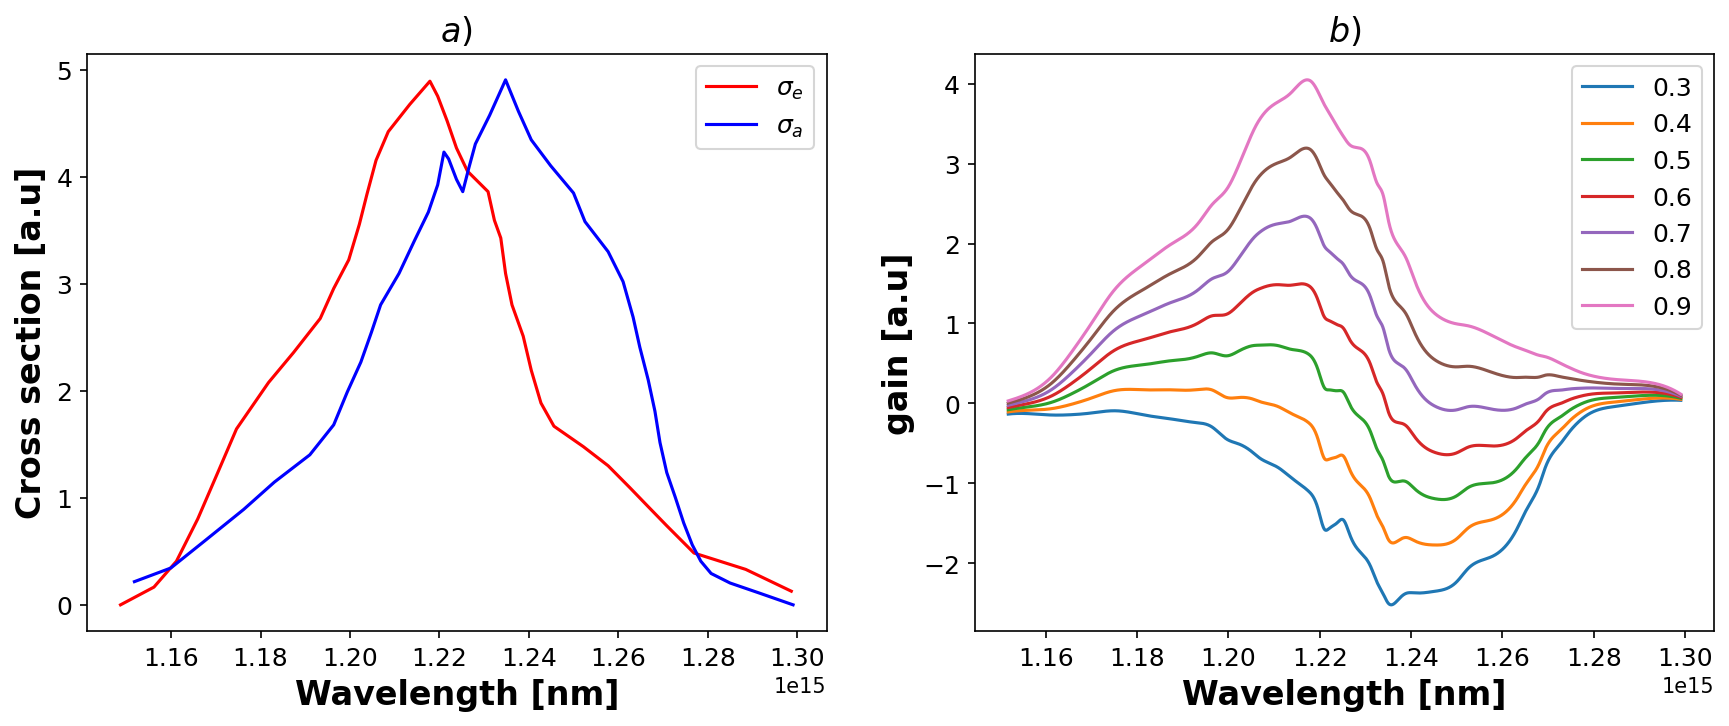

In [3]:
n = 2**12    # number of grid points
c = 299792458
TimeWindow = 5*1e-12 # width of time window [s]     
dT = TimeWindow/n
TimeGrid =  np.arange(-TimeWindow,TimeWindow,dT) #  time grid
dw=np.pi/(n*dT)
V=np.array([j*dw for j in range(-int(n),int(n))])
# Load emission and absorcion cross-section
emis=np.loadtxt('Emision.txt',delimiter=';')
ab=np.loadtxt('Absorcion.txt',delimiter=';')
emis_y = emis[:,1]
emis_x = np.sort((2*np.pi*c/(emis[:,0]*1e-9))) #np.linspace(1400,1650,len(emis_y))
we = emis_x
midwe = (max(we)+min(we))/2
we = we-midwe
abs_y = ab[:,1]
abs_x = np.sort((2*np.pi*c/(ab[:,0]*1e-9))) #np.linspace(1400,1650,len(emis_y))
wa = np.sort(abs_x)
midwa = (max(wa)+min(wa))/2
wa = wa-midwa
print(emis_x)
cse1 = CubicSpline(emis_x,emis_y)
emis_xdata = np.linspace(min(abs_x),max(emis_x),n*2)
Y_emis = cse1(emis_xdata)
cse = CubicSpline(we,emis_y)
csa = CubicSpline(wa,abs_y)
csa1 =  CubicSpline(abs_x,abs_y)
abs_xdata=np.linspace(min(abs_x),max(abs_x),n*2)
Y_abs=csa1(abs_xdata)


def gg1(G):

  return ((G)*cse1(emis_xdata)-(1-G)*csa1(abs_xdata))



f=plt.figure(figsize=(14,5),dpi=150)


plt.subplot(121)
plt.plot(emis_x,emis_y,'r',label='$\sigma_e$')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(abs_x,abs_y,'b',label='$\sigma_a$')
plt.title('$a)$',fontsize=16,fontweight='bold')
plt.xlabel('Wavelength [nm]',fontsize=16,fontweight='bold')
plt.ylabel('Cross section [a.u]',fontsize=16,fontweight='bold')
plt.legend(fontsize=12)


D= np.arange(0.3,1,0.1)
plt.subplot(122)

for i in D:
    
    plt.plot(abs_xdata,gg1(i),label=str(round(i,3)))
       
plt.xlabel('Wavelength [nm]',fontsize=16,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('gain [a.u]',fontsize=16,fontweight='bold')
plt.title('$b)$',fontsize=16,fontweight='bold')
plt.legend(fontsize=12)


# Modeling of Gain in Erbium-Doped Fiber Amplifiers

In [ ]:
def Pout(Pin,rho,A,gamma_k,sgma_k,sgme_k,L,tau):
    